Part 4
Load the data file wave_data1.txt (on JupyterHub) using np.loadtxt
The data file has a row each for 
(
t
,
ξ
)
 data where 
t
 is time in seconds and 
ξ
 is the surface elevation of a water column (in metres) at a particular location in a laboratory wave tank (like this). Unfortunately there are a few data points missing due to a mishap with the wave probe.

How many data points appear to be missing?

Use your interpolation function from part 1 to obtain a new uniformly sampled data set on 0.01s subintervals for the first 20s using piecewise cubic polynomials. Plot the new data alongside the equivalent data obtained using scipy.interpolate.CubicSpline.

Plot the difference between the piecewise cubic interpolation and the cubic spline interpolation obtained using scipy.interpolate.CubicSpline

[ 2.4 10.1 10.2 10.3 10.4 14.1 14.2 14.3]


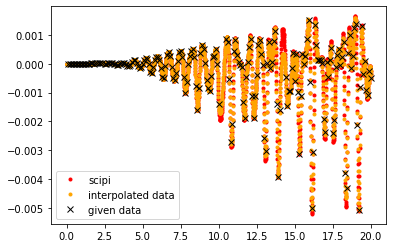

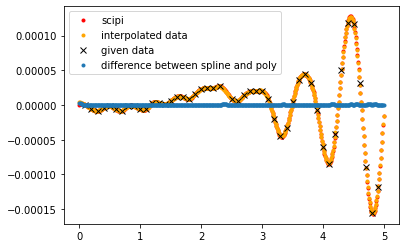

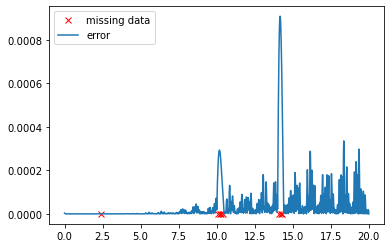

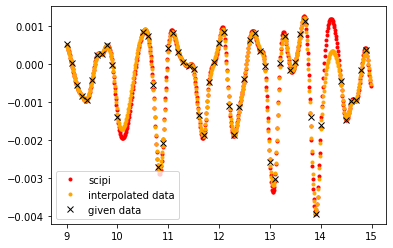

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import CubicSpline
fig = plt.figure("initial data")
ax = fig.add_subplot(1, 1, 1)


data1 = np.loadtxt('wave_data1.txt')
data1.shape

t = data1[0]
xi = data1[1]




missing_times = np.array([])

for i in range(1,len(t)):
    if t[i] == 20: #need the index of time = 20s for later in the question
        t20 = i
    diff = round(t[i] - t[i-1], 1)
    if diff > 0.1:
        nt = t[i-1]
        for j in range(1,int(10*diff)):
            missing_times = np.append(missing_times, nt + j/10) 

            
print(missing_times)


#Question 1 Code from Github:
def PiecewisePoly(Ndeg, x0, y0, x_j):
    
    MM = Ndeg + 1                      # degree + 1 = number of points to find
    N_interpolant = len(x0) - Ndeg      # number of polynomials to get 
    pts = np.arange(Ndeg+1) + np.arange(N_interpolant).reshape(N_interpolant,1)  # small set of x points
    
    a = np.zeros((Ndeg+1,N_interpolant))
    pows = (MM-1-np.arange(MM)).reshape(MM,1)         
    
    # coefs for every interpolant
    for i in range(N_interpolant):
        A = np.vander(x0[pts[i,:]])
        a[:,i] = np.linalg.solve(A,y0[pts[i,:]])     #vander + solving for small set of x points
    
     
    y = np.empty_like(x_j)
    
   
    pows = Ndeg-np.arange(MM)    #putting powers in correct order
    
    
    for n in range(len(x_j)):
        if((x_j[n]<x0).all()):
            k=0
        elif((x_j[n]>x0).all()):
            k=len(x0)-1
        else:                # find k for x_i, accounting for the possibility that x_i=x_k
            k = np.where(((x_j[n]<x0[1:]) & (x_j[n]>=x0[:-1])) | 
                         ((x0[1:]==x_j[n]) & (x_j[n]>x0[:-1])))[0][0]
     
        j = k - Ndeg//2    
        
        j = max(0,j)
        j = min(j,N_interpolant-1)
        
        y[n] = np.sum(a[:,j]*x_j[n]**pows)  # obtain new data point
      
    return y

#Need Data from t <= 20s
t0 = t[:t20+1]
xi0 = xi[:t20+1]
N = 2000
tj = np.linspace(0,20, 2000) #0.01 s interval from 0-20 seconds

xi_inter = PiecewisePoly(3, t0, xi0, tj)
xi_sci = CubicSpline(t0,xi0)(tj)


ax.plot(tj,xi_sci, ".", color = "red", label = 'scipi')
ax.plot(tj, xi_inter, ".", color = "orange", label = 'interpolated data')
ax.plot(t0, xi0, "x", color = "black", label = 'given data')
ax.legend()


#plotting between t= 0 and  t = 5 for bettter resolution:

qfig = plt.figure('zero and five')
qax = qfig.add_subplot(1,1,1)

tq = t0[:int(len(t0)/4)]
xiq = xi0[:int(len(t0)/4)]
tqj = tj[:int(len(tj)/4)]
xi_inter_q = xi_inter[:int(len(tj)/4)]
xi_sci_q = xi_sci[:int(len(tj)/4)]

qax.plot(tqj,xi_sci_q, ".", color = "red", label = 'scipi')
qax.plot(tqj, xi_inter_q, ".", color = "orange", label = 'interpolated data')
qax.plot(tq, xiq, "x", color = "black", label = 'given data')






erfig = plt.figure("error")
erax = erfig.add_subplot(1, 1, 1)
diff = np.absolute(xi_sci - xi_inter.reshape(len(xi_inter)))
z = np.zeros(len(missing_times))
erax.plot(missing_times, z, "x", label = 'missing data', color = 'red')
qax.plot(tqj, diff[:int(len(tj)/4)], ".", label = 'difference between spline and poly' )
erax.plot(tj, diff, label = 'error')
erax.legend()
qax.legend()


#exploring the areas around the large gaps in data
#plot between t = 9 and t = 15

#knots:


dolly_fig = plt.figure("9-15")
dax = dolly_fig.add_subplot(1,1,1)
rounded_t0 = np.round(t0, 2)
rounded_tj = np.round(tj,2)
lower_inter = np.where(rounded_tj == 9.)[0][0]
upper_inter = np.where(rounded_tj  == 15.)[0][0]
lower_knot = np.where(rounded_t0 == 9.)[0][0]
upper_knot = np.where(rounded_t0 == 15.)[0][0]

dolly_t0 = t0[lower_knot:upper_knot]
dolly_xi0 = xi0[lower_knot:upper_knot]

dolly_tj = tj[lower_inter:upper_inter]
dolly_xi_inter = xi_inter[lower_inter:upper_inter]
dolly_xi_sci = xi_sci[lower_inter:upper_inter]

dax.plot(dolly_tj,dolly_xi_sci, ".", color = "red", label = 'scipi')
dax.plot(dolly_tj, dolly_xi_inter, ".", color = "orange", label = 'interpolated data')
dax.plot(dolly_t0, dolly_xi0, "x", color = "black", label = 'given data')
dax.legend()




plt.show()

#largest errors occur at the gaps in the data, ~10s, and ~14s 

#plans for future:
#more specific graphs around the regions of high difference

